### GEOGRAPHIC DATA SCIENCE

Guest lecture by Sándor Juhász | [sandorjuhasz.com](sandorjuhasz.com)
<br>

**PART 1 -- Introduction to geographic data**
<br>


**Where to drink beer in Budapest?**

Better bars in Buda?  Which district is worth going out in?<br>

In the following we will explore standard geographic data files and learn how to plot, combine and aggregate geographic data.

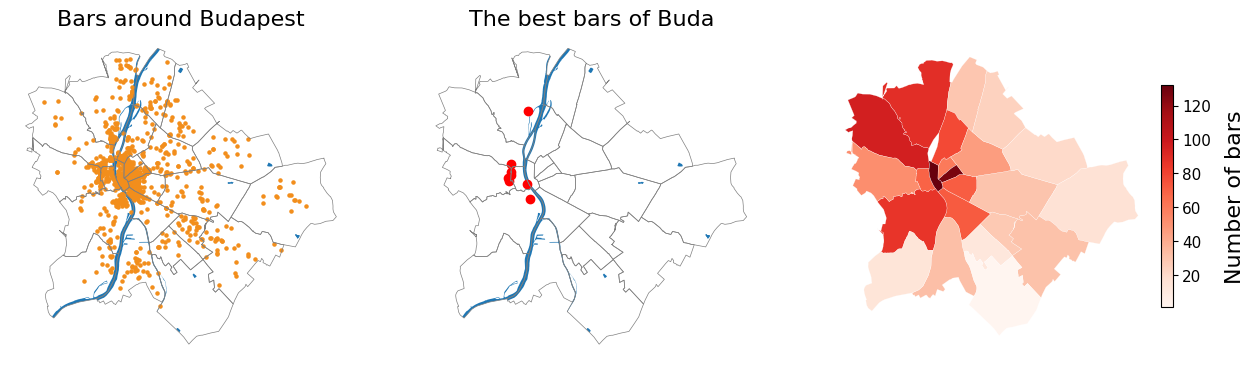

In [2]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

*/data/budapest_bars.geojson* contains information on BARS around Budapest (from Google Maps) -- let's use this as an example to start exploring geographic data

In [3]:
# google data on bars
bp_bars = gpd.read_file("../data/budapest_bars.geojson")
bp_bars

,place_id,rating,nr_ratings,geometry
0,ChIJx0eU_uDEQUcRwDaUKjnCANA,NaN,NaN,POINT (19.19672 47.53220)
1,ChIJZYwmScnFQUcREn8JAw0PyIE,NaN,NaN,POINT (19.20409 47.52600)
2,ChIJoxIOMvvCQUcR_mKC1vrTi00,NaN,NaN,POINT (19.15400 47.45407)
3,ChIJr-72e3fDQUcR63jCzlNzrDg,5.0,1.0,POINT (19.14578 47.45784)
4,ChIJxYGMie_CQUcRIbE-tYqbQgY,NaN,NaN,POINT (19.14959 47.45152)
...,...,...,...,...
1244,ChIJI5tZy7LdQUcRx033ityOz_Q,4.8,218.0,POINT (19.04982 47.47903)
1245,ChIJW7UkEcfZQUcRmRJnTCiodio,4.8,8.0,POINT (18.98290 47.53302)
1246,ChIJew3oD1vcQUcR88sk5uM2xYc,4.1,96.0,POINT (19.06337 47.49010)
1247,ChIJm_lcBm_cQUcRgZr2kTIWwhQ,4.3,214.0,POINT (19.06692 47.50374)


<Axes: >

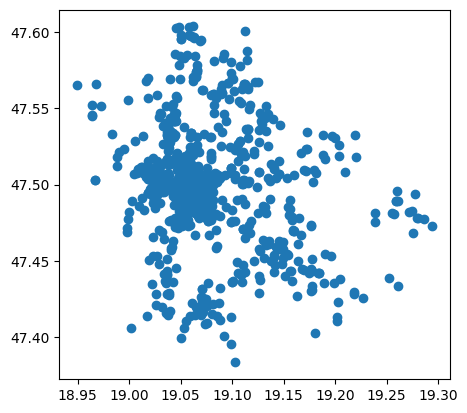

In [4]:
# plot the data
bp_bars.plot()

Seems like the 'geometry' column contains POINT objects with coordinates and we can very easily visualize a bunch of dots in an abstract space. But it definitely misses context! */data/shape_files/budapest_shape* contains a SHP shape file with the boarders of Budapest.

In [5]:
# Budapest shape
bp_shape = gpd.read_file("../data/shape_files/budapest_shape/budapest_shape.shp")
bp_shape


,name,geometry
0,Budapest,"POLYGON ((19.09928 47.61315, 19.10512 47.61148..."


<Axes: >

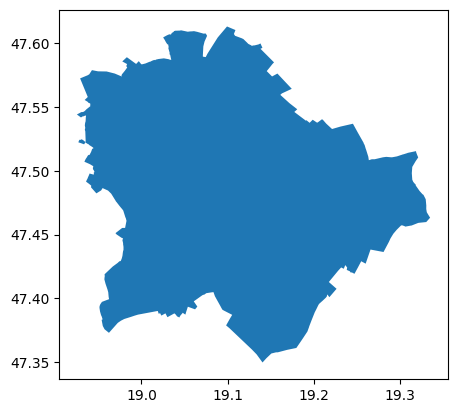

In [6]:
# check out how this 'POLYGON' looks like
bp_shape.plot()

<Axes: >

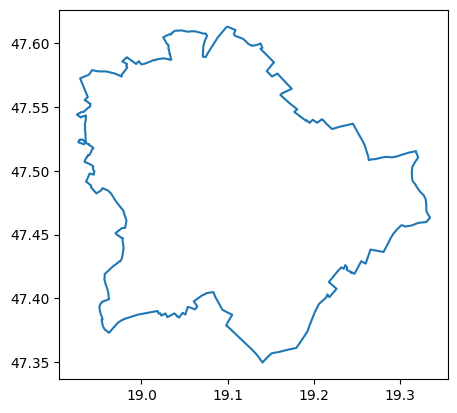

In [7]:
# this is not a LAKE -- so lets keep its boundary ONLY
bp_shape.boundary.plot()

<Axes: >

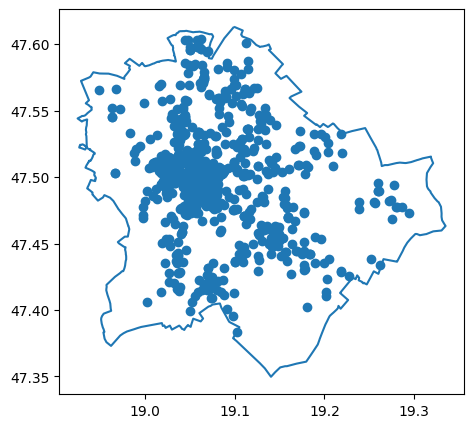

In [8]:
# lets combine the two
fig, ax = plt.subplots(1,1, figsize=(8,5))
bp_bars.plot(ax=ax)
bp_shape.boundary.plot(ax=ax)

It looks like these are indeed *bars* around Budapest. Budapest is famously devided by the river Duna. To add more context, we could probably add the waterfronts.

In [9]:
# rivers and waterfronts from OpenStreetMap -- bunch of different POLYGONs
bp_river_shape = gpd.read_file("../data/shape_files/budapest_waters_shape/budapest_waters_shape.shp")
bp_river_shape

,osm_id,code,fclass,name,area,perimeter,geometry
0,13256109,8200,water,bányató,0.000019,0.017516,"POLYGON ((19.12606 47.59283, 19.12607 47.59286..."
1,16714136,8200,water,Naplás-tó,0.000017,0.017304,"POLYGON ((19.24364 47.50855, 19.24365 47.50861..."
2,350126483,8200,water,Joker horgásztó,0.000010,0.013609,"POLYGON ((19.12385 47.36303, 19.12394 47.36306..."
3,368707839,8221,wetland,None,0.000011,0.014768,"POLYGON ((19.28062 47.44704, 19.28135 47.44764..."
4,368707839,8221,wetland,None,0.000011,0.014768,"POLYGON ((19.28062 47.44704, 19.28135 47.44764..."
5,420097059,8221,wetland,None,0.000011,0.014411,"POLYGON ((19.14539 47.41144, 19.14543 47.41156..."
6,417508,8200,water,Ráckevei-Duna-észak,0.000140,0.292031,"POLYGON ((19.09856 47.37857, 19.09824 47.37874..."
7,187129,8200,water,Duna,0.000024,0.037802,"POLYGON ((19.07527 47.60687, 19.07615 47.60582..."
8,6712324,8200,water,Duna,0.000274,0.166929,"POLYGON ((19.09928 47.61315, 19.10059 47.61277..."
9,742287535,8221,wetland,None,0.000011,0.017722,"POLYGON ((19.19159 47.49341, 19.19201 47.49398..."


<Axes: >

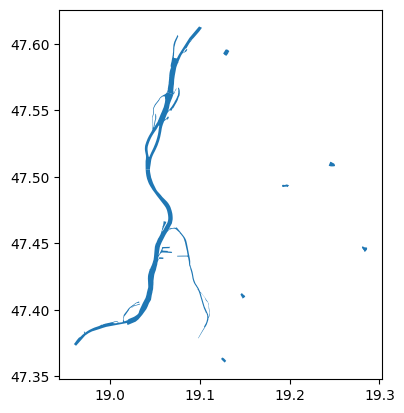

In [10]:
# lets see how they look like
bp_river_shape.plot()

<Axes: >

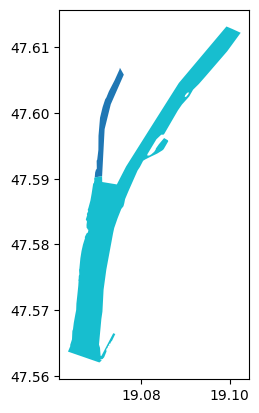

In [11]:
# why do we have multiple rows with the name "Duna"
bp_river_shape[(bp_river_shape["osm_id"]=="6712324") | (bp_river_shape["osm_id"]=="187129")].plot(column="osm_id")

It is cool, but usually we work with boring administrative data. So let's bring districts to the map.

In [12]:
# districts
bp_districts = gpd.read_file("../data/shape_files/budapest_districts_shape/budapest_districts_shape.shp")
bp_districts

,name,buda01,geometry
0,XX. kerulet,0,"POLYGON ((19.09361 47.44164, 19.09373 47.44170..."
1,VII. kerulet,0,"POLYGON ((19.08019 47.51094, 19.08057 47.51112..."
2,XXII. kerulet,1,"POLYGON ((19.03455 47.43890, 19.03527 47.43784..."
3,IX. kerulet,0,"POLYGON ((19.09361 47.44164, 19.09356 47.44150..."
4,XVI. kerulet,0,"POLYGON ((19.22078 47.49255, 19.21069 47.49454..."
5,VI. kerulet,0,"POLYGON ((19.06333 47.51770, 19.06354 47.51778..."
6,IV. kerulet,0,"POLYGON ((19.10784 47.60665, 19.10863 47.60584..."
7,XIX. kerulet,0,"POLYGON ((19.15741 47.43840, 19.15811 47.43797..."
8,XV. kerulet,0,"POLYGON ((19.13811 47.59984, 19.14036 47.59640..."
9,V. kerulet,0,"POLYGON ((19.05483 47.49851, 19.05484 47.49815..."


Let's combine all this somehow to have a very nice plot on *bars around Budapest*! 

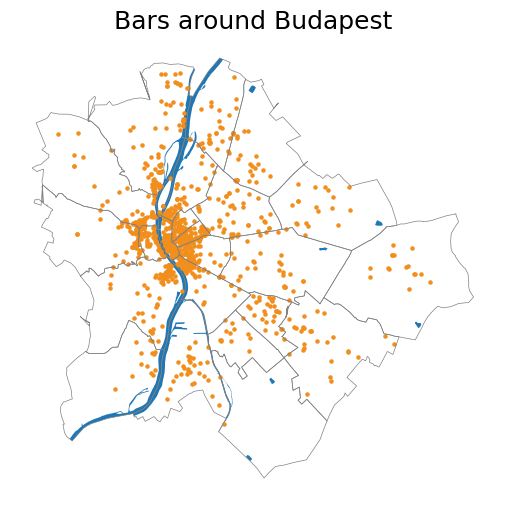

In [13]:
# Budapest shape
bp_shape = gpd.read_file("../data/shape_files/budapest_shape/budapest_shape.shp")

# river shape
bp_river_shape = gpd.read_file("../data/shape_files/budapest_waters_shape/budapest_waters_shape.shp")

# districts
bp_districts = gpd.read_file("../data/shape_files/budapest_districts_shape/budapest_districts_shape.shp")

# google data on bars
bp_bars = gpd.read_file("../data/budapest_bars.geojson")

fig, ax = plt.subplots(1,1, figsize=(8,6))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)
bp_bars.plot(color="#f28e1c", markersize=5, ax=ax)
ax.set_title("Bars around Budapest", size=18)
ax.set_axis_off()

**Best bars around Buda?**

Use *sjoin* (spatial join) to combine the tables and identify bars (POINT) around districts of Buda (POLYGON) from spatial data.

In [14]:
# look at the tables
bp_bars.head(2)

,place_id,rating,nr_ratings,geometry
0,ChIJx0eU_uDEQUcRwDaUKjnCANA,NaN,NaN,POINT (19.19672 47.53220)
1,ChIJZYwmScnFQUcREn8JAw0PyIE,NaN,NaN,POINT (19.20409 47.52600)


In [15]:
bp_districts.head(2)

,name,buda01,geometry
0,XX. kerulet,0,"POLYGON ((19.09361 47.44164, 19.09373 47.44170..."
1,VII. kerulet,0,"POLYGON ((19.08019 47.51094, 19.08057 47.51112..."


In [16]:
# identify bars around Buda through spatial join (sjoin)
bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])

,place_id,rating,nr_ratings,geometry,index_right,name,buda01
16,ChIJT3b-N2fZQUcRbfDL1pdO_tY,4.3,361.0,POINT (19.04370 47.54194),22,III. kerulet,1
17,ChIJHVP9FarZQUcR9uz6S8NYsqg,NaN,NaN,POINT (19.04430 47.54549),22,III. kerulet,1
18,ChIJpyESP2TZQUcRfuMiyerTuNM,5.0,2.0,POINT (19.04523 47.54696),22,III. kerulet,1
19,ChIJmarxWlDZQUcRoL5ubKErtmQ,5.0,5.0,POINT (19.04321 47.54633),22,III. kerulet,1
20,ChIJ8enHS5vZQUcRXH2Yo7MpDxI,4.6,15.0,POINT (19.04589 47.54206),22,III. kerulet,1
...,...,...,...,...,...,...,...
1225,ChIJEcntqaDeQUcRBiVonNgt1yk,NaN,NaN,POINT (19.02780 47.50779),19,I. kerulet,1
1232,ChIJ-8sBHo_ZQUcRgcDpuhItKGk,4.8,116.0,POINT (19.06189 47.57081),22,III. kerulet,1
1240,ChIJZZ360E3cQUcRZnvtR5o57EQ,4.5,581.0,POINT (19.05227 47.48322),20,XI. kerulet,1
1244,ChIJI5tZy7LdQUcRx033ityOz_Q,4.8,218.0,POINT (19.04982 47.47903),20,XI. kerulet,1


We must plot it, to be sure that it works!

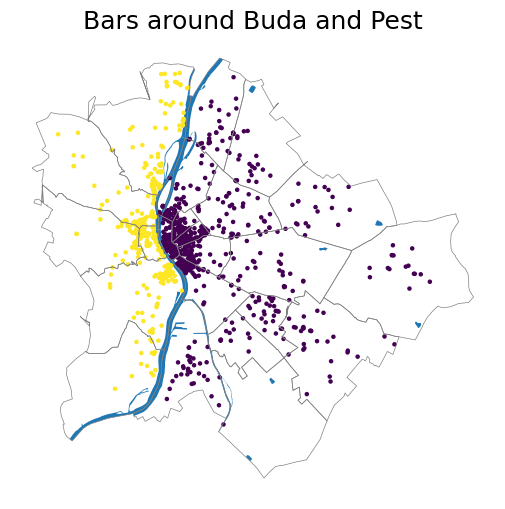

In [17]:
# Buda and Pest bars
fig, ax = plt.subplots(1,1, figsize=(8,6))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)

# identify bars around Buda through spatial join (sjoin)
buda_bars = bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])["place_id"].to_list()
bp_bars["buda_bar"] = np.where(bp_bars["place_id"].isin(buda_bars), 1, 0)
bp_bars.plot(column="buda_bar", markersize=5, ax=ax)

ax.set_title("Bars around Buda and Pest", size=18)
ax.set_axis_off()

Looks good! *sjoin* seems to be a very powerful tool! So far we joined POINT and POLYGON type of data. Does it work with a set of POLYGONs?

Let's see if there are bars close to the river Duna in district IX. and XI.

<Axes: >

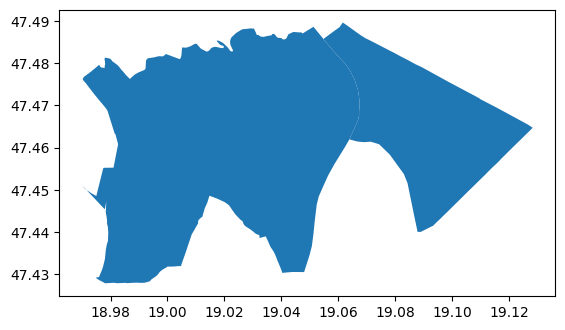

In [18]:
# data prep
focal_districts = ["IX. kerulet", "XI. kerulet"]
fd = bp_districts[bp_districts["name"].isin(focal_districts)]
fd.plot()

In [19]:
# join river POLYGON and district POLYGON
river_in_fd = gpd.sjoin(bp_river_shape, fd, how="inner", predicate="intersects")
river_in_fd

,osm_id,code,fclass,name_left,area,perimeter,geometry,index_right,name_right,buda01
6,417508,8200,water,Ráckevei-Duna-észak,0.000140,0.292031,"POLYGON ((19.09856 47.37857, 19.09824 47.37874...",3,IX. kerulet,0
11,30036,8200,water,None,0.000888,0.596955,"POLYGON ((19.01969 47.38857, 19.01895 47.39010...",20,XI. kerulet,1
11,30036,8200,water,None,0.000888,0.596955,"POLYGON ((19.01969 47.38857, 19.01895 47.39010...",3,IX. kerulet,0


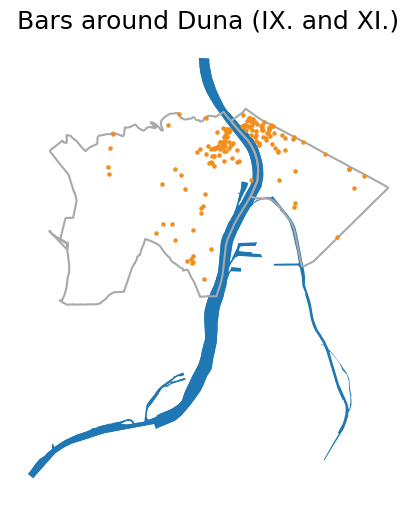

In [20]:
# bars around the river Duna
fd_bars = bp_bars.sjoin(fd)

fig, ax = plt.subplots(1,1, figsize=(8,6))
river_in_fd.plot(ax=ax, zorder=2)
fd.boundary.plot(color="darkgrey", ax=ax, zorder=3)
fd_bars.plot(color="#f28e1c", markersize=5, ax=ax, zorder=4)

ax.set_title("Bars around Duna (IX. and XI.)", size=18)
ax.set_axis_off()

Let's find the best bars around Buda!

In [21]:
# identify bars around Buda through spatial join (sjoin)
buda_bars = bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])["place_id"].to_list()
bp_bars["buda_bar"] = np.where(bp_bars["place_id"].isin(buda_bars), 1, 0)

In [22]:
# define the bests
rating_threshold = 4.9
minimum_rating = 20
buda01 = 1
best_bars = bp_bars[
    (bp_bars["rating"] >= rating_threshold)
    & (bp_bars["nr_ratings"] >= minimum_rating)
    & (bp_bars["buda_bar"] == buda01)
]

bp_bars["best_on_side"] = (bp_bars["place_id"].isin(best_bars["place_id"])).astype(int)

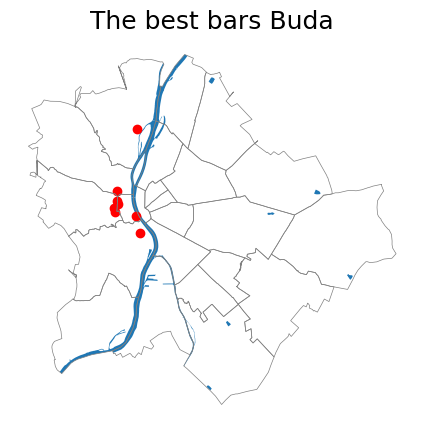

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)
bp_bars[bp_bars["best_on_side"]==1].plot(color="red", ax=ax)
ax.set_title("The best bars Buda", size=18)
ax.set_axis_off()

It is good to know that there are cool bars around Buda, but the map of bar dots suggest that Pest has a higher density of bars. Let's make a standard plot to show the number of bars per district.

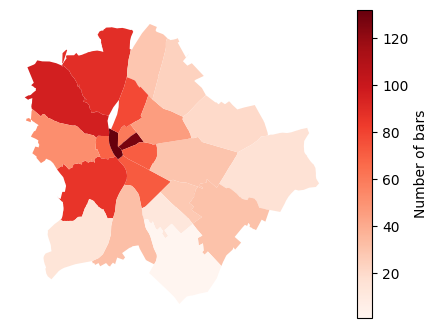

In [28]:
# use spatial join to figure out bar and district relations
bars_in_districts = bp_districts.sjoin(bp_bars)

# pandas magic to aggregate data by districts
bars_in_districts = bars_in_districts.groupby(["name", "geometry"]).agg(nr_bars = pd.NamedAgg("place_id", "nunique")).reset_index()

# turn the pandas DataFrame into a GeoDataFrame
bars_in_districts = gpd.GeoDataFrame(bars_in_districts)

# make it stellar!
fig,ax = plt.subplots(1,1, figsize=(6,4))
bars_in_districts.plot(column="nr_bars", cmap="Reds", legend=True, legend_kwds={"label": "Number of bars", "orientation": "vertical"}, ax=ax)
ax.set_axis_off()

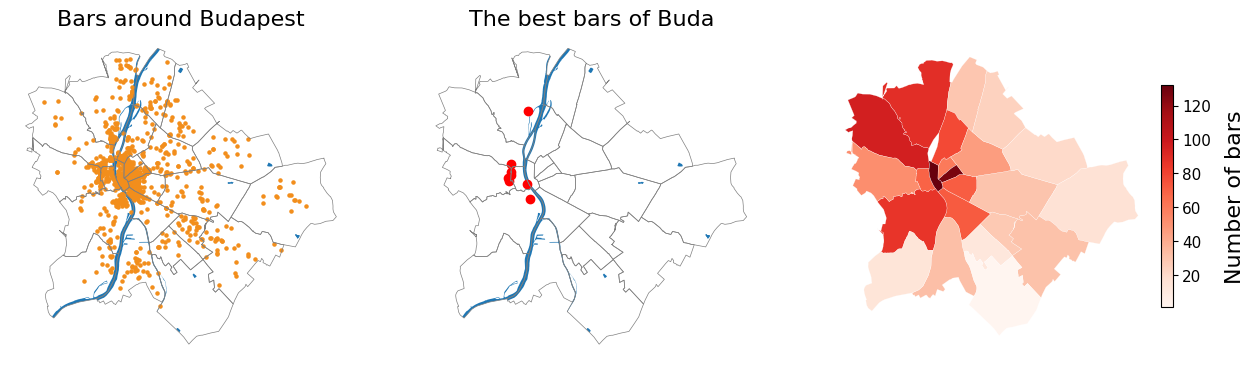

In [31]:
# combine all the above to make things look just NICE
fig, ax = plt.subplots(1,3, figsize=(15, 5))
fontsize=16

bp_river_shape.plot(ax=ax[0])
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax[0])
bp_bars.plot(color="#f28e1c", markersize=5, ax=ax[0])
ax[0].set_title("Bars around Budapest", size=fontsize)
ax[0].set_axis_off()

bp_river_shape.plot(ax=ax[1])
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax[1])
bp_bars[bp_bars["best_on_side"]==1].plot(color="red", ax=ax[1])
ax[1].set_title("The best bars of Buda", size=fontsize)
ax[1].set_axis_off()

bars_in_districts.plot(column="nr_bars", cmap="Reds", ax=ax[2])
bars_in_districts.boundary.plot(color="white", linewidth=0.125, ax=ax[2])
ax[2].axis('off')

# create colorbar as a legend
vmin = bars_in_districts["nr_bars"].min()
vmax = bars_in_districts["nr_bars"].max()

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.0325, pad=0.025, shrink=0.9, ax=ax[2])
cbar.ax.set_ylabel("Number of bars", size=fontsize)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.tick_params(labelsize = fontsize-5)
ax[2].set_axis_off()